In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

In [63]:
df = pd.read_csv('./simc_combined.csv')

In [64]:
df.describe()

,age,respiratory_baseline,etco2_baseline,baseline_te_hp_on_sap,baseline_te_sap_on_hp,te_hp_on_sap_6b,te_sap_on_hp_6b,te_hp_on_sap_10b,te_sap_on_hp_10b,te_hp_on_sap_15b,te_sap_on_hp_15b
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,22.541667,16.832965,38.260851,0.916320,1.070730,0.726146,0.606761,0.820505,0.921869,0.776631,1.000351
std,3.148211,4.427319,3.359011,0.229413,0.212595,0.161962,0.154545,0.223651,0.227860,0.239879,0.171961
min,18.000000,9.634073,32.534684,0.267068,0.430449,0.371470,0.283020,0.202559,0.459446,0.200841,0.648706
25%,20.750000,13.222311,36.297407,0.845776,0.940000,0.597474,0.497550,0.703437,0.788918,0.638152,0.902879
50%,22.000000,17.013230,38.087978,0.928797,1.073981,0.752353,0.591790,0.845426,0.918829,0.808597,1.000308
75%,24.250000,20.197643,40.240064,1.037090,1.255285,0.818704,0.715376,0.975895,1.033418,0.949882,1.122809
max,31.000000,23.960226,45.512716,1.321890,1.452878,1.044237,1.002821,1.123539,1.408595,1.108528,1.263871


In [65]:
df["sex"].value_counts()

sex
K    15
M     9
Name: count, dtype: int64

In [66]:
df['rr>15'] = df['respiratory_baseline'].values > 15

In [67]:
df

,sex,age,respiratory_baseline,etco2_baseline,baseline_te_hp_on_sap,baseline_te_sap_on_hp,te_hp_on_sap_6b,te_sap_on_hp_6b,te_hp_on_sap_10b,te_sap_on_hp_10b,te_hp_on_sap_15b,te_sap_on_hp_15b,rr>15
0,K,22,11.224083,33.302414,0.973619,1.045411,0.743760,0.690018,0.772176,0.907003,0.200841,0.648706,False
1,M,20,9.634073,42.410429,1.109192,1.066510,0.888064,0.702208,0.447252,0.755656,1.108528,1.263871,False
2,K,21,11.131654,36.449327,1.034429,1.101015,1.044237,0.762048,0.675935,0.513810,0.507217,0.711347,False
3,K,22,10.989251,39.064649,1.131707,1.308987,0.569481,0.484869,0.930702,1.146682,0.941704,1.202789,False
4,K,31,23.960226,37.562689,0.448687,0.981411,0.780740,0.505185,0.951683,1.220122,1.084539,1.188610,True
5,K,25,19.113292,36.866423,0.961140,1.269426,0.627114,0.765456,0.842255,0.985350,0.566272,1.072175,True
6,K,25,21.884791,35.841646,0.816804,1.254912,0.722811,0.523486,0.848598,0.820818,1.077476,1.257774,True
7,K,25,23.715126,39.204650,1.250935,1.299495,0.564168,0.419200,0.932721,0.975474,0.771986,1.090624,True
8,M,22,13.266794,32.534684,0.851070,0.816421,0.786722,0.597791,0.529687,0.866231,0.792783,1.196474,False
9,K,22,21.916836,37.380056,1.045074,1.452878,0.781474,1.002821,0.632162,0.978470,0.841362,1.119041,True


# Box plots

In [130]:
def make_boxplot(df):
    plt.figure(figsize=(10, 5), dpi=200)
    plt.suptitle("Impact of breathing on TE", fontsize=16)
    plt.subplot(1, 2, 1)
    plt.boxplot([df["baseline_te_hp_on_sap"], df["te_hp_on_sap_6b"], df["te_hp_on_sap_10b"], df["te_hp_on_sap_15b"]], tick_labels=["resting", "6b", "10b", "15b"])
    plt.title(r'$TE_{HP \rightarrow SAP}$', fontsize=14)
    plt.ylabel(r'$TE_{HP \rightarrow SAP}$', fontsize=14)
    plt.xlabel('Breathing', fontsize=12)
    plt.xticks(fontsize=11)
    plt.subplot(1, 2, 2)
    plt.boxplot([df["baseline_te_sap_on_hp"], df["te_sap_on_hp_6b"], df["te_sap_on_hp_10b"], df["te_sap_on_hp_15b"]], tick_labels=["resting", "6b", "10b", "15b"])
    plt.title(r"$TE_{SAP \rightarrow HP}$", fontsize=14)
    plt.ylabel(r"$TE_{SAP \rightarrow HP}$", fontsize=14)
    plt.xlabel('Breathing', fontsize=12)
    plt.xticks(fontsize=11)
    plt.show()

## All data combined

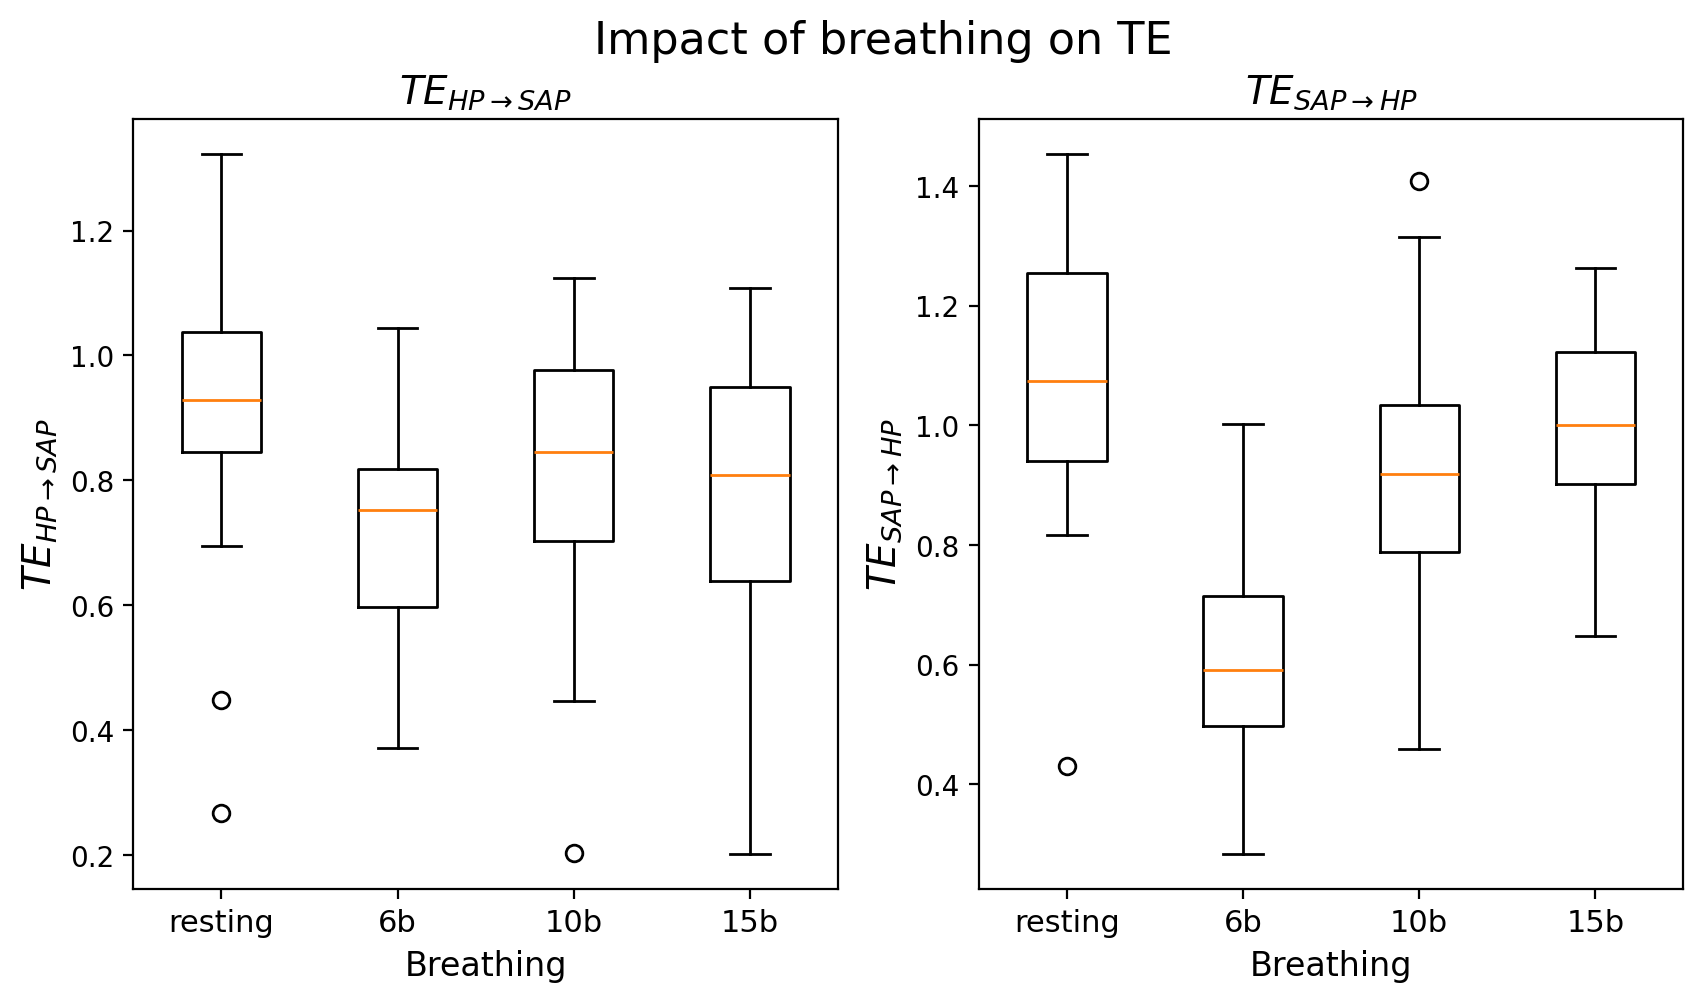

In [131]:
make_boxplot(df)

# Statistics

## Refactor data

In [72]:
def melt_data(dataframe, val_name):
  df_long = pd.melt(
    dataframe.reset_index(),
    id_vars=['index', 'sex', 'rr>15'],
    value_vars=[f'baseline_{val_name}', f'{val_name}_6b', f'{val_name}_10b', f'{val_name}_15b'],
    var_name='breating',
    value_name=f'{val_name}',
    )
  
  df_long.rename(columns={'index': 'subject'}, inplace=True)
  df_long['breating'] = df_long['breating'].replace({
    'baseline_te_hp_on_sap': 'resting',
    'te_hp_on_sap_6b': '6b',
    'te_hp_on_sap_10b': '10b',
    'te_hp_on_sap_15b': '15b'
  })
  df_long['breating'] = df_long['breating'].replace({
    'baseline_te_sap_on_hp': 'resting',
    'te_sap_on_hp_6b': '6b',
    'te_sap_on_hp_10b': '10b',
    'te_sap_on_hp_15b': '15b'
  })

  return df_long

In [73]:
df_long_1 = melt_data(df, "te_hp_on_sap")
df_long_2 = melt_data(df, "te_sap_on_hp")

In [74]:
df_long_1

,subject,sex,rr>15,breating,te_hp_on_sap
0,0,K,False,resting,0.973619
1,1,M,False,resting,1.109192
2,2,K,False,resting,1.034429
3,3,K,False,resting,1.131707
4,4,K,True,resting,0.448687
...,...,...,...,...,...
91,19,M,True,15b,0.677374
92,20,M,True,15b,0.662112
93,21,K,False,15b,1.087377
94,22,K,True,15b,0.921664


## 1 Repeated Measurements ANOVA

### TE_(HP->SAP)

In [75]:
anova = pg.rm_anova(
    dv='te_hp_on_sap',     # Zmienna zależna
    within='breating',    # Czynnik wewnątrzosobniczy
    subject='subject',     # ID pacjenta
    data=df_long_1
)

anova

,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,breating,3,69,3.260829,0.026583,0.098677,0.936147


### TE_(SAP->HP)

In [76]:
anova = pg.rm_anova(
    dv='te_sap_on_hp',     # Zmienna zależna
    within='breating',    # Czynnik wewnątrzosobniczy
    subject='subject',     # ID pacjenta
    data=df_long_2
)

anova

,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,breating,3,69,26.751671,1.368439e-11,0.465533,0.941653


## 2 Mixed-design ANOVA

### TE_(HP->SAP) + sex

In [77]:
anova = pg.mixed_anova(
    dv='te_hp_on_sap',     # Zmienna zależna
    within='breating',    # Czynnik wewnątrzosobniczy
    between='sex',      # Czynnik międzyosobniczy
    subject='subject',     # ID pacjenta
    data=df_long_1
)

anova

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,sex,0.013039,1,22,0.013039,0.297674,0.590834,0.013350,NaN
1,breating,0.469423,3,66,0.156474,3.274386,0.026437,0.129554,0.936147
2,Interaction,0.157071,3,66,0.052357,1.095624,0.357263,0.047439,NaN


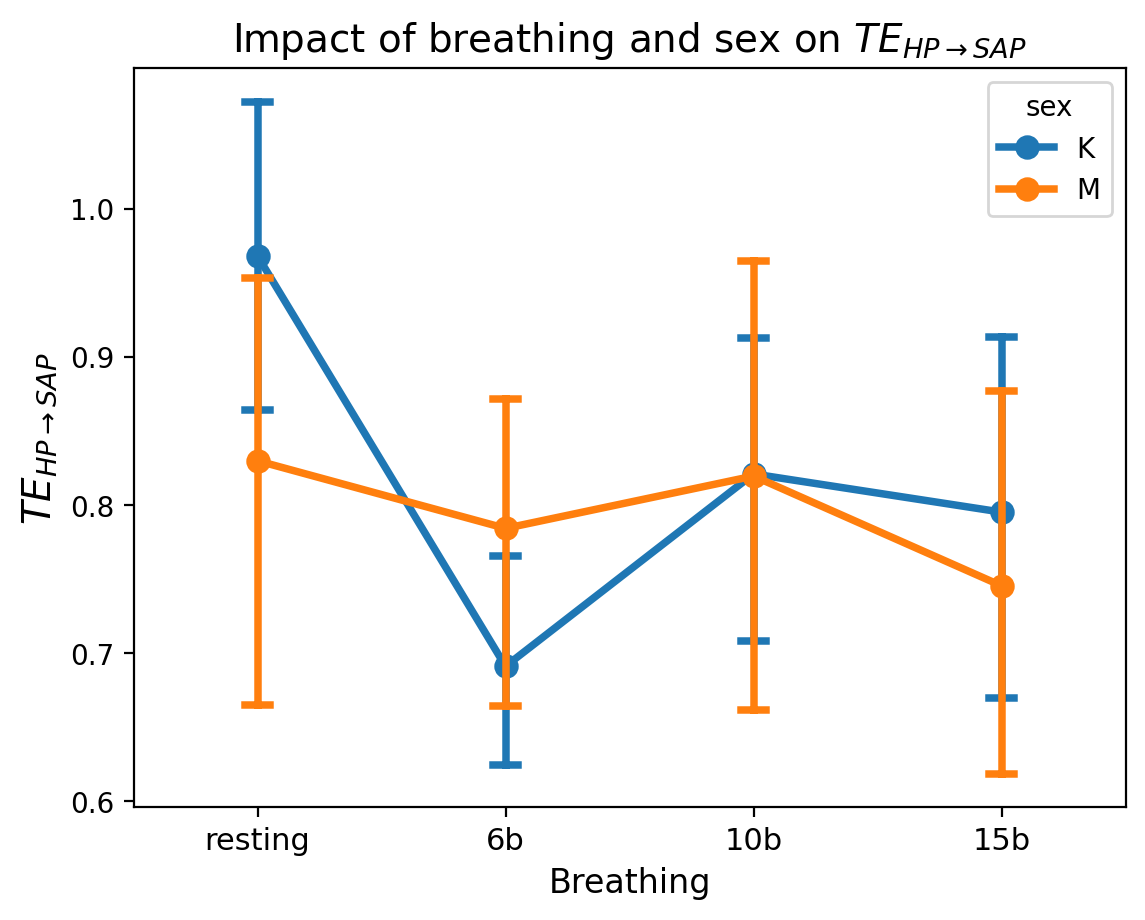

In [109]:
plt.figure(dpi=200)
sns.pointplot(data=df_long_1, x='breating', y='te_hp_on_sap', hue='sex', capsize=.1)
plt.title(r'Impact of breathing and sex on $TE_{HP \rightarrow SAP}$', fontsize=14)
plt.ylabel(r'$TE_{HP \rightarrow SAP}$', fontsize=14)
plt.xlabel('Breathing', fontsize=12)
plt.xticks(fontsize=11)
plt.show()

### TE_(HP->SAP) + r

In [79]:
anova = pg.mixed_anova(
    dv='te_hp_on_sap',     # Zmienna zależna
    within='breating',    # Czynnik wewnątrzosobniczy
    between='rr>15',      # Czynnik międzyosobniczy
    subject='subject',     # ID pacjenta
    data=df_long_1
)

anova

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,rr>15,0.000478,1,22,0.000478,0.010774,0.918270,0.000489,NaN
1,breating,0.469423,3,66,0.156474,3.151983,0.030611,0.125317,0.936147
2,Interaction,0.034592,3,66,0.011531,0.232268,0.873588,0.010447,NaN


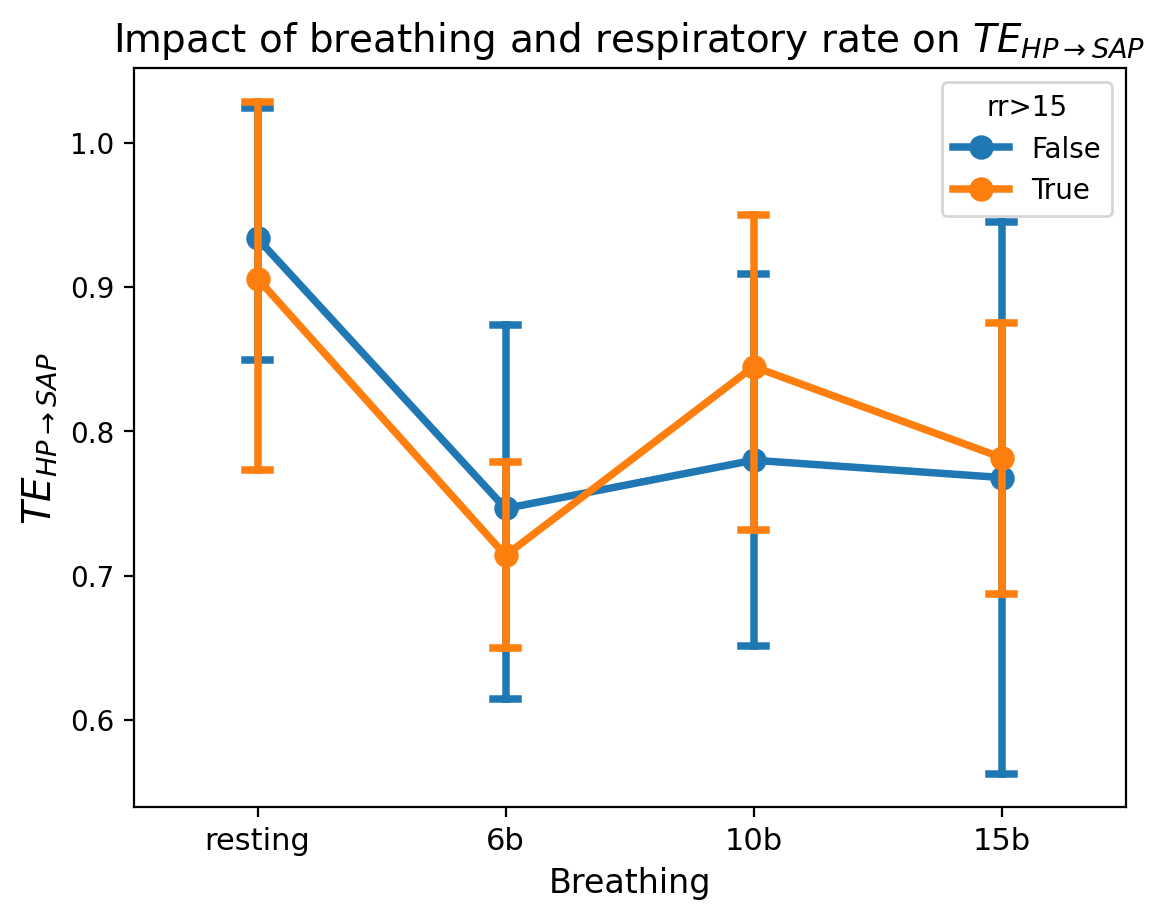

In [108]:
plt.figure(dpi=200)
sns.pointplot(data=df_long_1, x='breating', y='te_hp_on_sap', hue='rr>15', capsize=.1)
plt.title(r'Impact of breathing and respiratory rate on $TE_{HP \rightarrow SAP}$', fontsize=14)
plt.ylabel(r'$TE_{HP \rightarrow SAP}$', fontsize=14)
plt.xlabel('Breathing', fontsize=12)
plt.xticks(fontsize=11)
plt.show()

### TE_(SAP->HP) + sex

In [81]:
anova = pg.mixed_anova(
    dv='te_sap_on_hp',     # Zmienna zależna
    within='breating',    # Czynnik wewnątrzosobniczy
    between='sex',      # Czynnik międzyosobniczy
    subject='subject',     # ID pacjenta
    data=df_long_2
)

anova

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,sex,0.099507,1,22,0.099507,2.842359,1.059419e-01,0.114416,NaN
1,breating,3.016480,3,66,1.005493,30.213807,2.067372e-12,0.578656,0.941653
2,Interaction,0.397015,3,66,0.132338,3.976604,1.147147e-02,0.153084,NaN


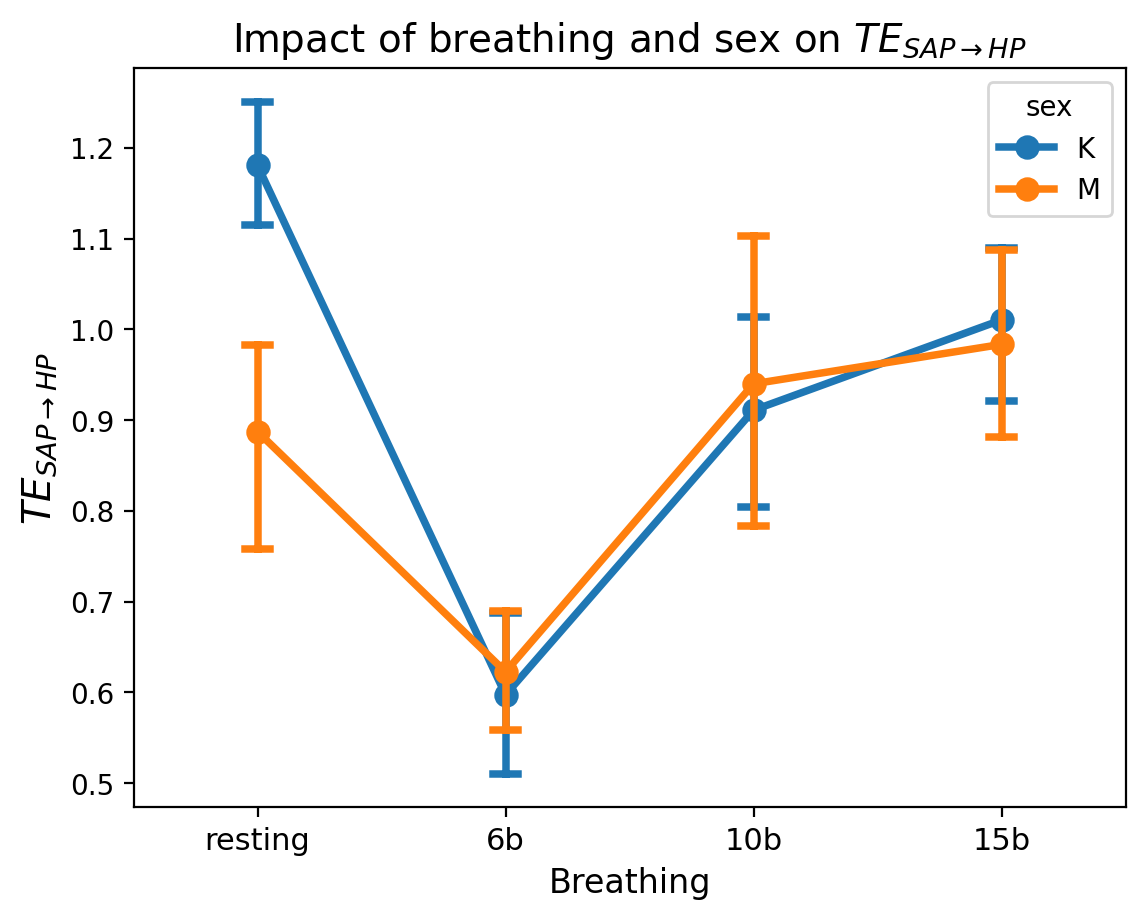

In [106]:
plt.figure(dpi=200)
sns.pointplot(data=df_long_2, x='breating', y='te_sap_on_hp', hue='sex', capsize=.1)
plt.title(r'Impact of breathing and sex on $TE_{SAP \rightarrow HP}$', fontsize=14)
plt.ylabel(r'$TE_{SAP \rightarrow HP}$', fontsize=14)
plt.xlabel('Breathing', fontsize=12)
plt.xticks(fontsize=11)
plt.show()

### TE_(SAP->HP) + r

In [83]:
anova = pg.mixed_anova(
    dv='te_sap_on_hp',     # Zmienna zależna
    within='breating',    # Czynnik wewnątrzosobniczy
    between='rr>15',      # Czynnik międzyosobniczy
    subject='subject',     # ID pacjenta
    data=df_long_2
)

anova

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,rr>15,0.016875,1,22,0.016875,0.435331,5.162333e-01,0.019404,NaN
1,breating,3.016480,3,66,1.005493,25.729436,3.870648e-11,0.539069,0.941653
2,Interaction,0.014200,3,66,0.004733,0.121124,9.473536e-01,0.005475,NaN


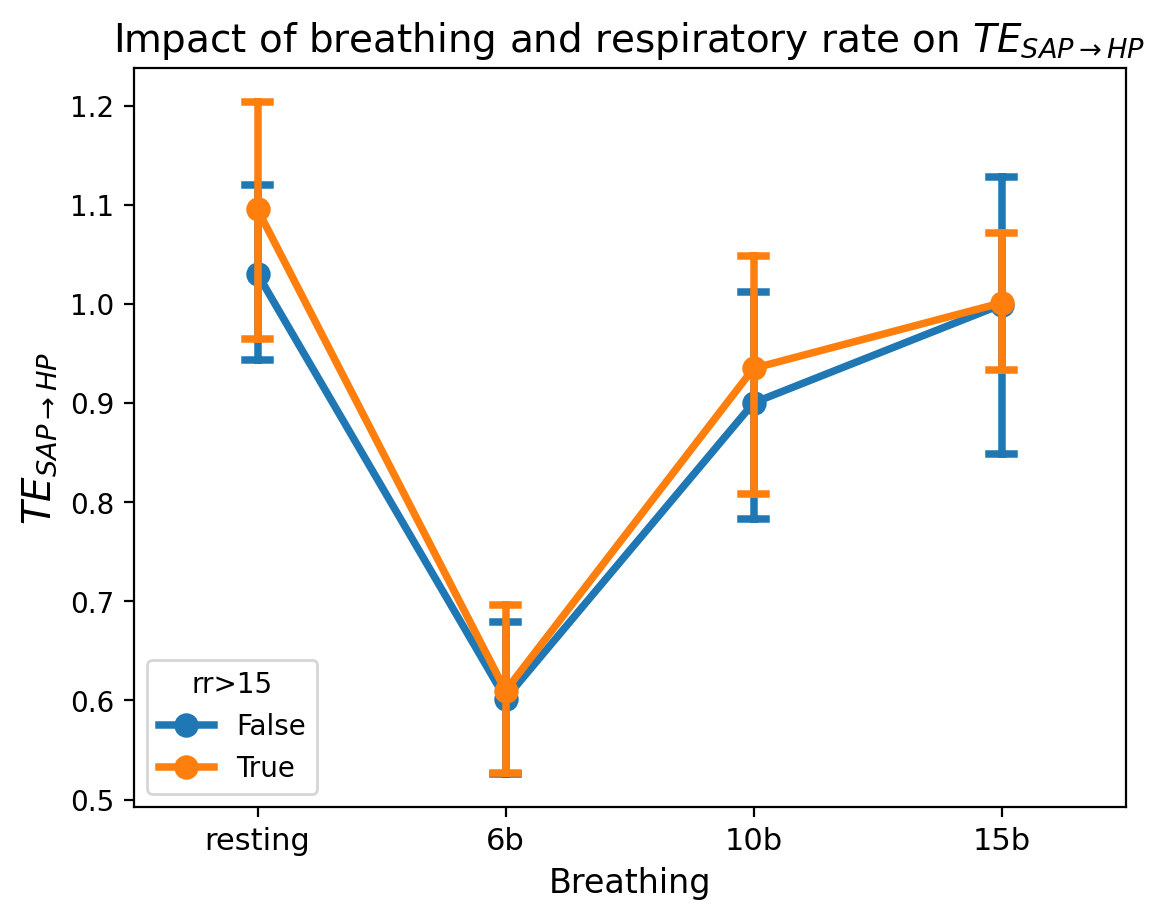

In [103]:
plt.figure(dpi=200)
sns.pointplot(data=df_long_2, x='breating', y='te_sap_on_hp', hue='rr>15', capsize=.1)
plt.title(r'Impact of breathing and respiratory rate on $TE_{SAP \rightarrow HP}$', fontsize=14)
plt.ylabel(r'$TE_{SAP \rightarrow HP}$', fontsize=14)
plt.xlabel('Breathing', fontsize=12)
plt.xticks(fontsize=11)
plt.show()